<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Stud_Migration_ML22Aug25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Students Migration Analysis - ML
# Mount your Google Drive in Colab:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# access the file with:
import pandas as pd
path = '/content/drive/My Drive/DA_Practise_Folder_EXCEL/global_student_migration.csv'
df = pd.read_csv(path)
df.head()


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [3]:
# Check missing Data
# Check for missing values
print(df.isnull().sum())

# Get basic info about dataset
print(df.info())

# Quick statistical summary for numeric columns
print(df.describe())


student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             

In [4]:
# handling missing values:
# Fill missing categorical data with 'Unknown'
df['placement_country'].fillna('Unknown', inplace=True)
df['placement_company'].fillna('Unknown', inplace=True)
df['language_proficiency_test'].fillna('Unknown', inplace=True)

# Confirm no more nulls
print(df.isnull().sum())


student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64


/tmp/ipython-input-3102498621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['placement_country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3102498621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [5]:
# Encode categorical variables for ML
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['origin_country', 'destination_country', 'destination_city',
            'university_name', 'course_name', 'field_of_study',
            'scholarship_received', 'enrollment_reason', 'placement_status',
            'placement_country', 'placement_company', 'visa_status',
            'post_graduation_visa', 'language_proficiency_test']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['origin_country', 'destination_country', 'destination_city',
            'university_name', 'course_name', 'field_of_study',
            'scholarship_received', 'enrollment_reason', 'placement_status',
            'placement_country', 'placement_company', 'visa_status',
            'post_graduation_visa', 'language_proficiency_test']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [6]:
# split data into features and target, then train-test split
from sklearn.model_selection import train_test_split

# Target: scholarship_received (already encoded)
X = df.drop(columns=['student_id', 'scholarship_received'])
y = df['scholarship_received']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Simple Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.495
              precision    recall  f1-score   support

           0       0.49      0.26      0.34       499
           1       0.50      0.73      0.59       501

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.49      0.49      0.47      1000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Scale the features to help convergence:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Retrain Logistic Regression with scaled data and more iterations:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.504
              precision    recall  f1-score   support

           0       0.51      0.27      0.35       499
           1       0.50      0.73      0.60       501

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.50      0.50      0.48      1000



In [10]:
# Accuracy is still around 50%
# Going for a stronger model like Random Forest:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       499
           1       0.52      0.59      0.55       501

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [11]:
# addressing possible class imbalance with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_res = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_res))
print(classification_report(y_test, y_pred_res))


Accuracy: 0.502
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       499
           1       0.50      0.51      0.51       501

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



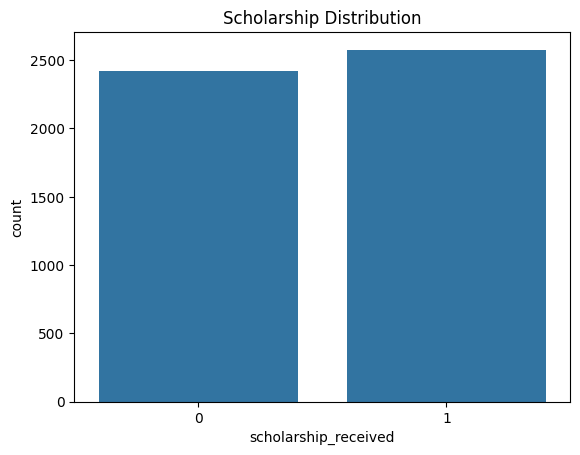

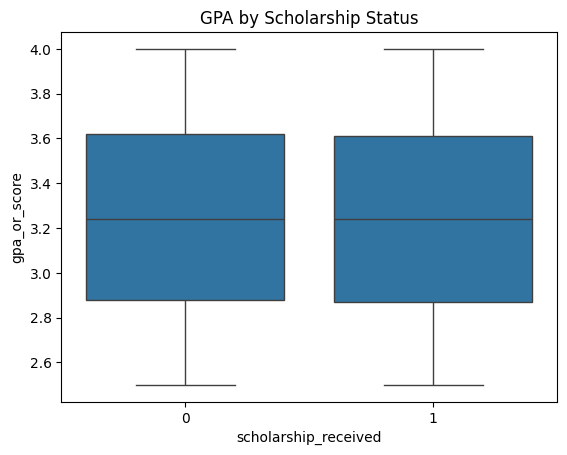

ValueError: could not convert string to float: 'S00001'

<Figure size 800x600 with 0 Axes>

In [12]:
# EDA to Find Understand data distribution and balanc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scholarship distribution
sns.countplot(x='scholarship_received', data=df)
plt.title('Scholarship Distribution')
plt.show()

# 2. GPA distribution by scholarship
sns.boxplot(x='scholarship_received', y='gpa_or_score', data=df)
plt.title('GPA by Scholarship Status')
plt.show()

# 3. Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# 4. Countplot of destination countries
plt.figure(figsize=(12,6))
sns.countplot(y='destination_country', data=df, order=df['destination_country'].value_counts().index)
plt.title('Destination Countries Count')
plt.show()


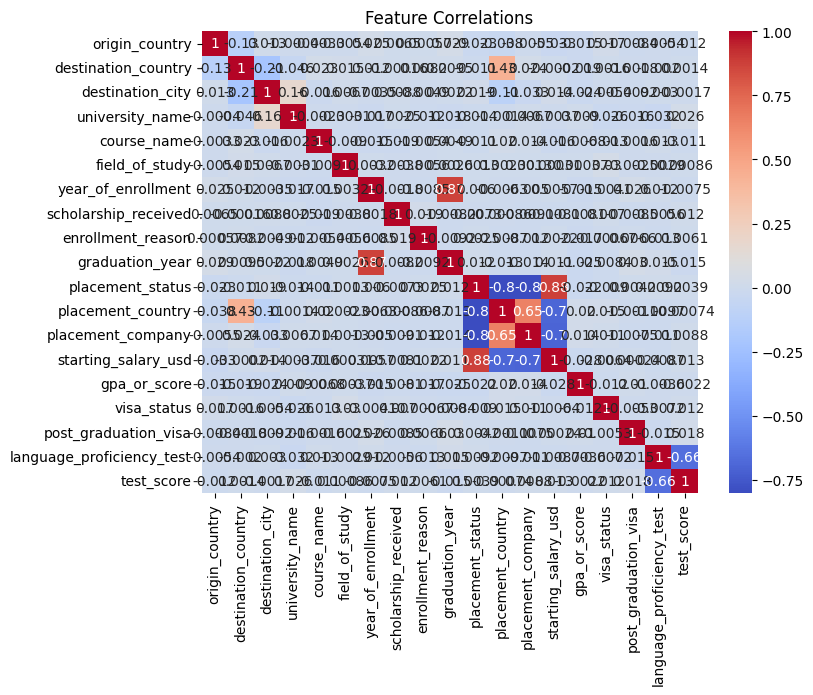

In [13]:
# Selecting  only numeric columns for correlation:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [14]:
# course_duration by subtracting enrollment from graduation year:
df['course_duration'] = df['graduation_year'] - df['year_of_enrollment']
df[['year_of_enrollment', 'graduation_year', 'course_duration']].head()


,year_of_enrollment,graduation_year,course_duration
0,2021,2024,3
1,2023,2024,1
2,2019,2020,1
3,2021,2023,2
4,2020,2021,1


In [16]:
# feature engineering for- salary_bracket — test_pass — post_grad_visa_flag
# Salary brackets
bins = [-1, 20000, 60000, df['starting_salary_usd'].max()]
labels = ['Low', 'Medium', 'High']
df['salary_bracket'] = pd.cut(df['starting_salary_usd'], bins=bins, labels=labels)

# Test score pass/fail (threshold: 5)
df['test_pass'] = df['test_score'].apply(lambda x: 'Pass' if x >= 5 else 'Fail')

# Post-graduation visa flag (Yes=1, No=0)
df['post_grad_visa_flag'] = df['post_graduation_visa'].astype(str).apply(lambda x: 1 if x.lower() == 'yes' else 0)


df[['starting_salary_usd', 'salary_bracket', 'test_score', 'test_pass', 'post_graduation_visa', 'post_grad_visa_flag']].head()


,starting_salary_usd,salary_bracket,test_score,test_pass,post_graduation_visa,post_grad_visa_flag
0,36416,Medium,7.8,Pass,4,0
1,32956,Medium,7.9,Pass,1,0
2,0,Low,0.0,Fail,0,0
3,50892,Medium,0.0,Fail,2,0
4,54790,Medium,8.2,Pass,1,0


In [19]:
# Check unique values
print(df['post_graduation_visa'].unique())
# Treat non-zero as 'Yes', zero as 'No'
df['post_grad_visa_flag'] = df['post_graduation_visa'].apply(lambda x: 1 if x != 0 else 0)


[4 1 0 2 3]


In [20]:
# Encoding  all categorical columns including new features for ML:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['origin_country', 'destination_country', 'destination_city',
            'university_name', 'course_name', 'field_of_study',
            'scholarship_received', 'enrollment_reason', 'placement_status',
            'placement_country', 'placement_company', 'visa_status',
            'language_proficiency_test', 'salary_bracket', 'test_pass']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])



In [21]:
# Full code to encode, split, and train a Random Forest again
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical columns
cat_cols = ['origin_country', 'destination_country', 'destination_city',
            'university_name', 'course_name', 'field_of_study',
            'scholarship_received', 'enrollment_reason', 'placement_status',
            'placement_country', 'placement_company', 'visa_status',
            'language_proficiency_test', 'salary_bracket', 'test_pass']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Define features and target
X = df.drop(columns=['student_id', 'scholarship_received'])
y = df['scholarship_received']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.516
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       499
           1       0.52      0.56      0.54       501

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



Model accuracy hovered around 50-52%, indicating weak predictive power.